<h1> California Housing Price </h1>
<h2> Source </h2>
<p>This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). </p>

<li>longitude: A measure of how far west a house is; a higher value is farther west </li>
<li>latitude: A measure of how far north a house is; a higher value is farther north </li>
<li>housingMedianAge: Median age of a house within a block; a lower number is a newer building </li>
<li>totalRooms: Total number of rooms within a block </li>
<li>totalBedrooms: Total number of bedrooms within a block </li>
<li>population: Total number of people residing within a block</li>
<li>households: Total number of households, a group of people residing within a home unit, for a block </li>
<li>medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars) </li>
<li>medianHouseValue: Median house value for households within a block (measured in US Dollars)</li>
<li>oceanProximity: Location of the house w.r.t ocean/sea </li>

In [209]:
# Importing the needed packages for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [210]:
# Checking the file basic info to examine what would possible changes should be made.
house = pd.read_csv("housing.csv")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p> Since each column's data type matches its expected characteristics, we won't be changing the data type in any way. </p>

In [211]:
# We just want to check the data
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [212]:
# First step for analyzing data is to check if there's null values
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<p> As we can see, there are only 207 quantity NA values in the total_bedrooms columns. </p>

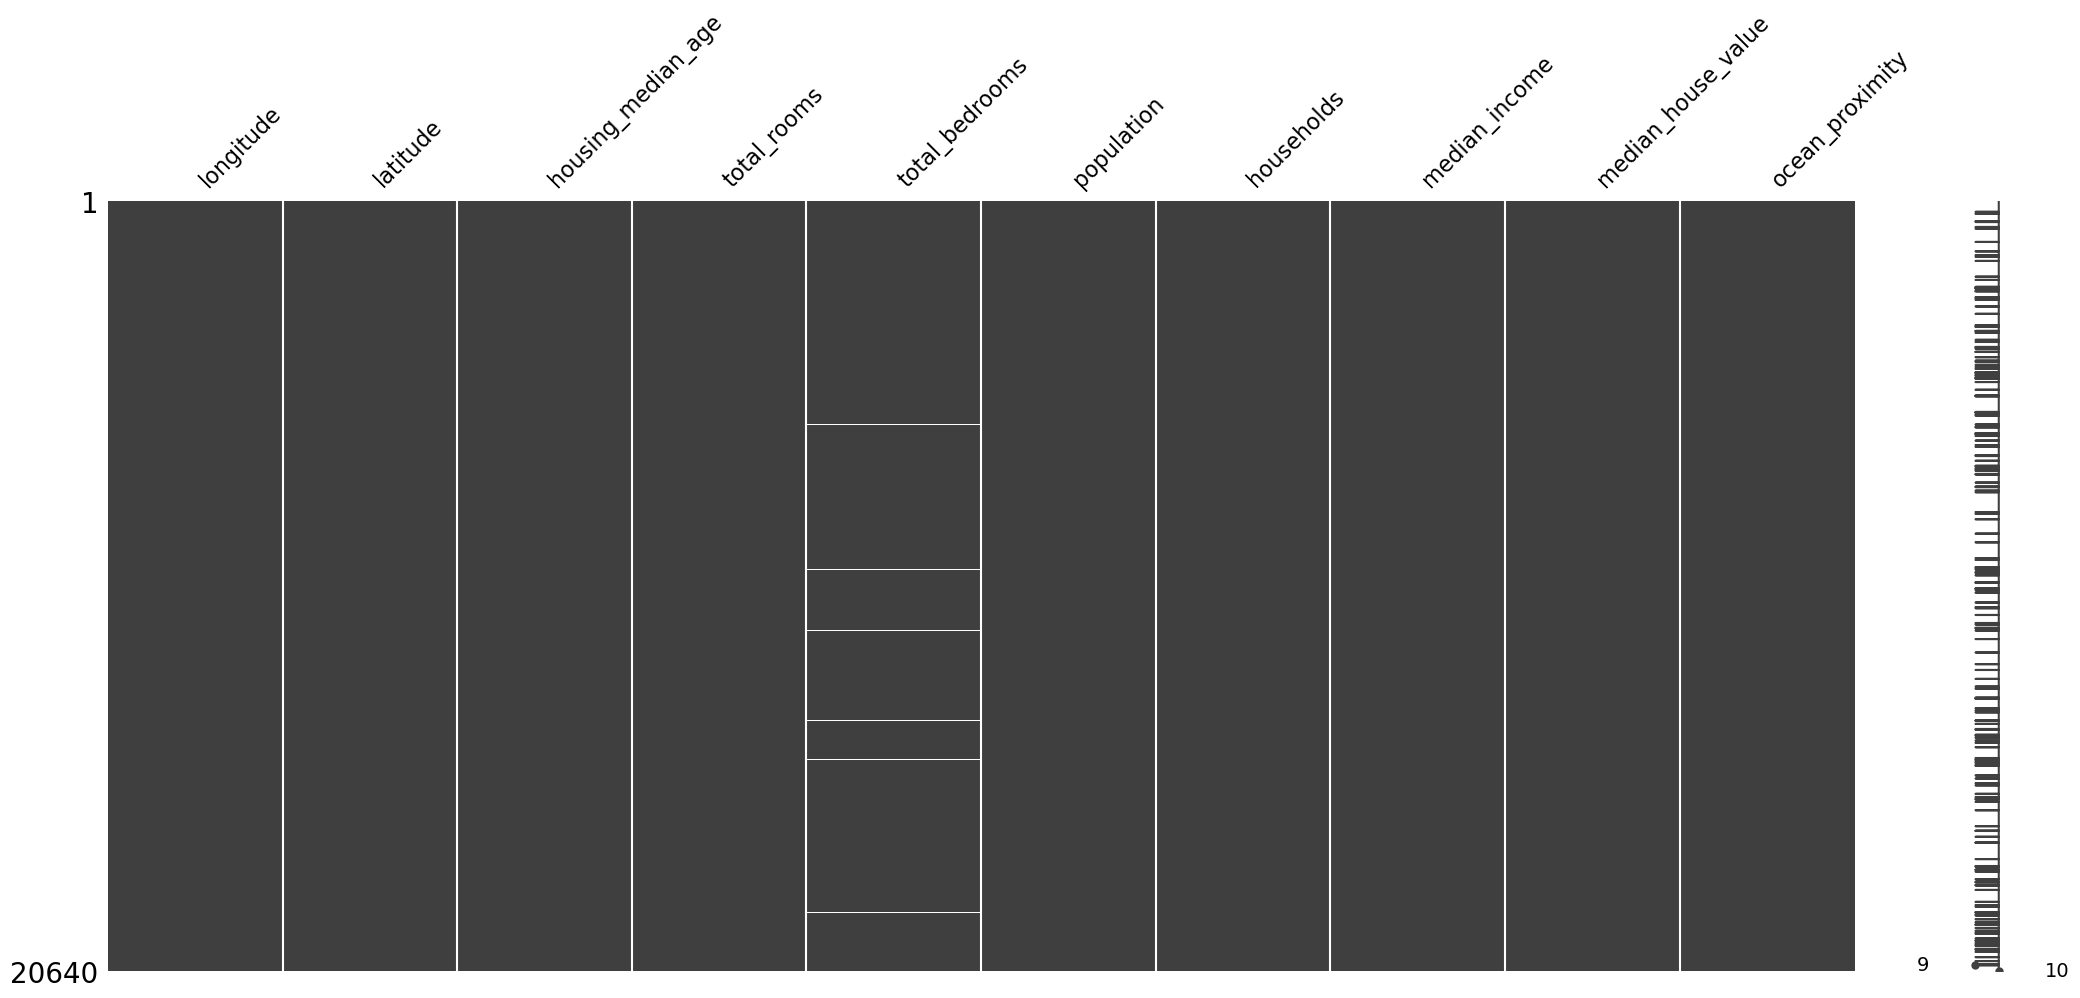

In [213]:
# missingno is a package for visualizing missing values in a column.
# Visualize missingness matrix
import missingno as msno
msno.matrix(house)
plt.show()

<p> As I was examining the data, I noticed a pattern in the total_bedrooms and households column. This means that in order to fill the NA values, we must analyze which technique to use. Since the two appear to be related, I chose to fill in the NA values in the model I created by using the two columns to predict the data in total_bedrooms. </p>

In [214]:
# I get the first the data without the NA values
house_diff = house[~house["total_bedrooms"].isnull()]
diff =  house_diff["households"] - house_diff["total_bedrooms"]
print(house_diff[["households", "total_bedrooms"]].corr())

                households  total_bedrooms
households        1.000000        0.979728
total_bedrooms    0.979728        1.000000


In [215]:
# by creating the model, I'm gonna use it to predict the missing total_bedrooms using the household variable.
household = ols("total_bedrooms ~ households", data=house_diff).fit()
house["total_bedrooms"].fillna(household.predict(house["households"]), inplace=True)

In [216]:
# Checking if we truly fill the NA in total_bedrooms
house.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [217]:
# Second step, we want to check if there's duplicate in the data.
house.duplicated().any()

False

In [218]:
# We need to quicly examine the descriptive statistics of numerical variable.
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.985253,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.332560,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


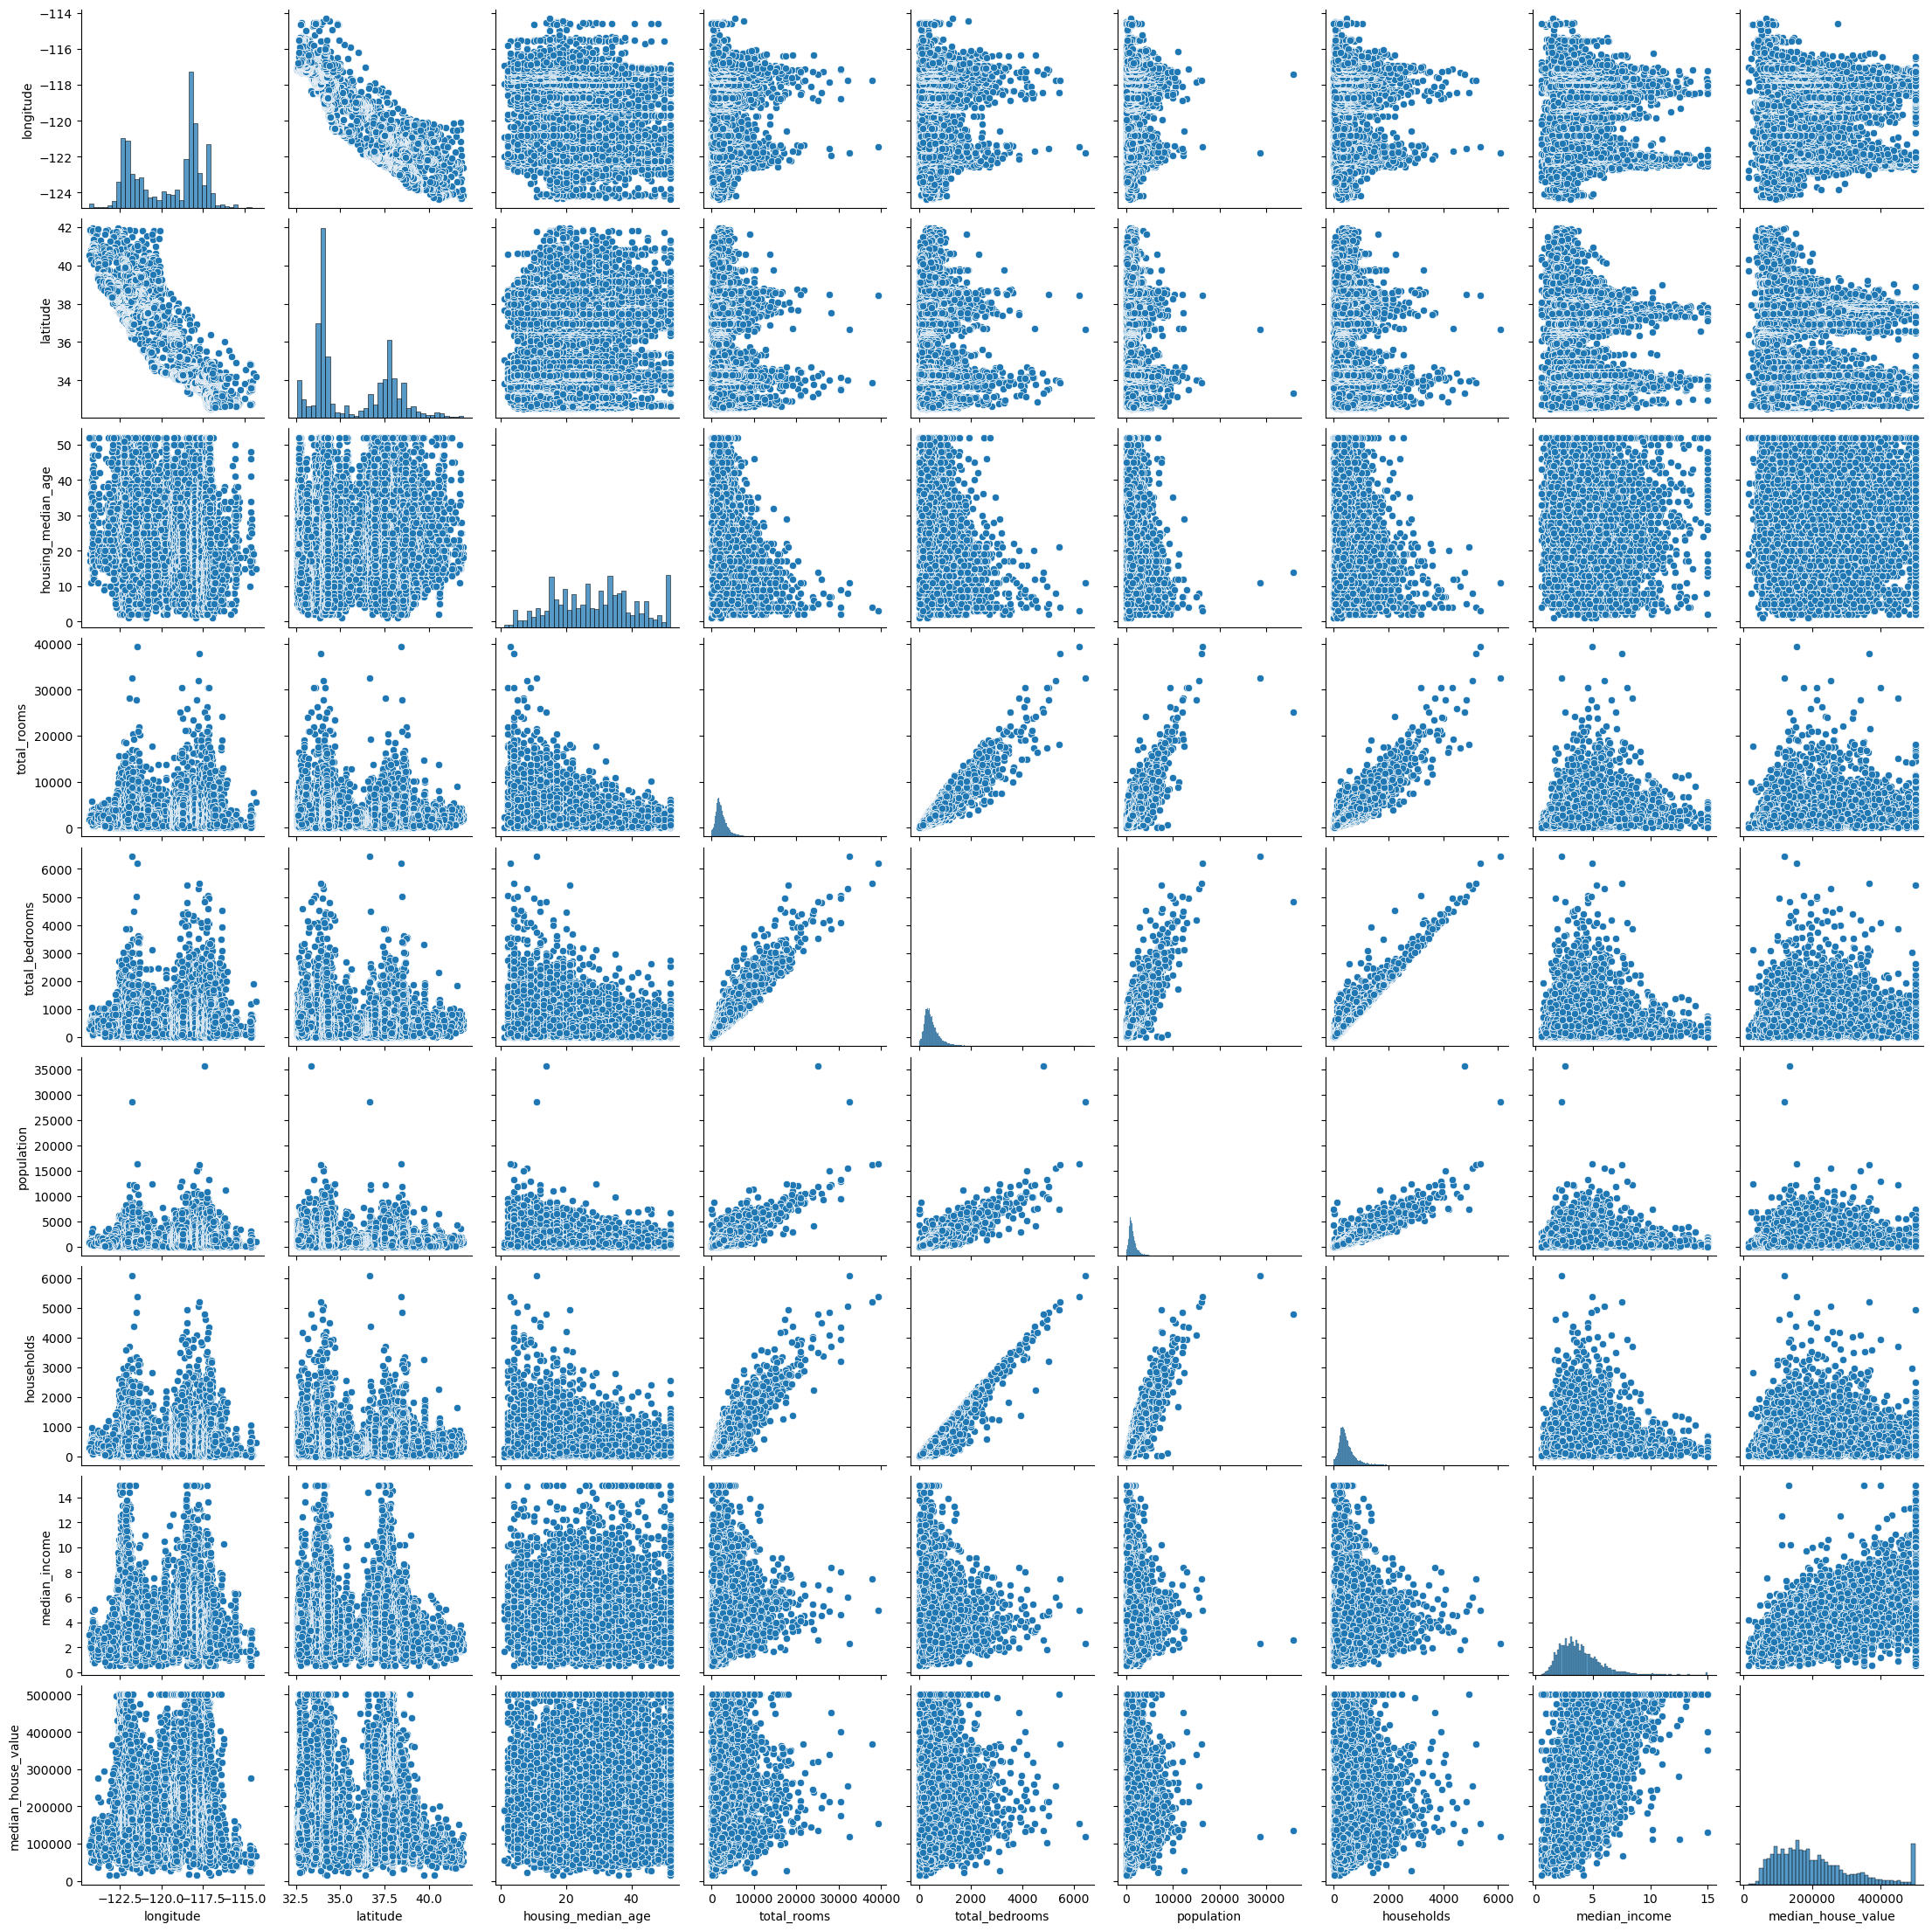

In [219]:
# Visualize each variable to intuitively check what variable related to one another.
sns.pairplot(house)
plt.show()

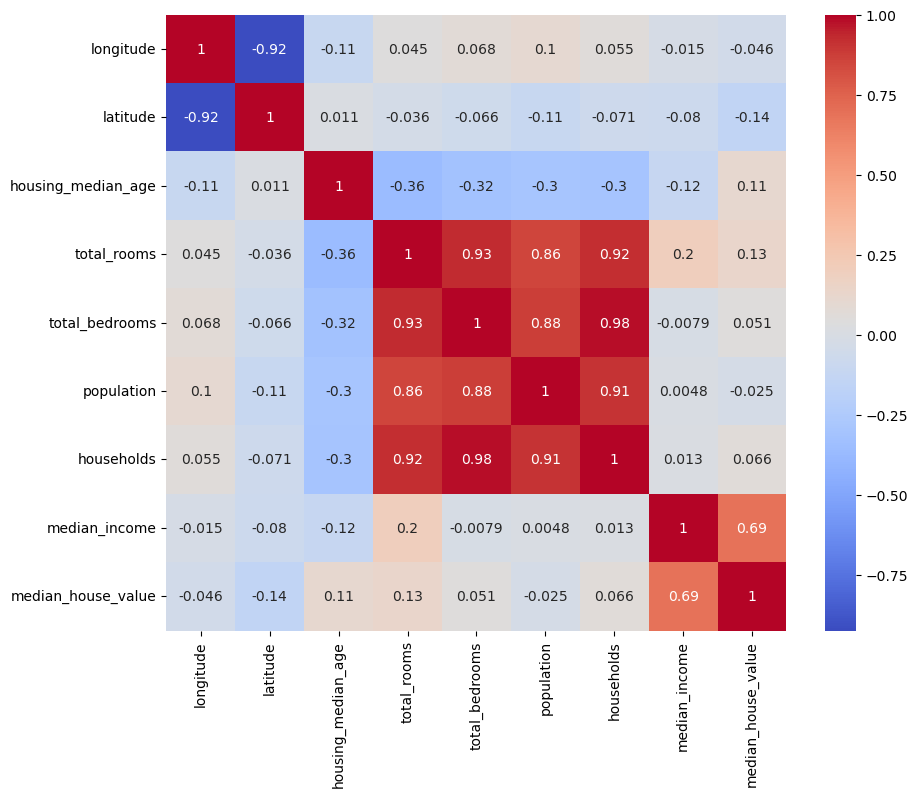

In [220]:
plt.figure(figsize=(10,8))
sns.heatmap(house.drop("ocean_proximity", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

<p> As we can see, there is a high correlation between the explanatory variables total_rooms, total_bedrooms, population, and households. This will have an impact on the entire model by undermining the multicollinearity assumptions. </p>
<p> We will take the appropriate action later on to correct the assumptions. </p>

In [221]:
# In categorical data, we need to know how many factor is present.
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [222]:
# Since categorical data is not ordinal we will convert it to binary values, dummy variables, in order to make a robust model.
house["ocean_proximity"].astype("category")
dummies = pd.get_dummies(house["ocean_proximity"], drop_first=True)
house = pd.concat([house, dummies], axis=1)
house.rename(columns = {"<1H OCEAN":"H_OCEAN", 'NEAR BAY':"NEAR_BAY", 'NEAR OCEAN':"NEAR_OCEAN"}, inplace=True)
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


In [223]:
# We will convert the median_income back to ten of thousands format to avoid confusion.
house["median_income"] = house["median_income"] * 10000

In [224]:
# We are now examine the regression model without changes first in explanatory variable to compare it later to changed one.
from statsmodels.formula.api import ols
house_reg = ols("median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income + ISLAND + INLAND + NEAR_BAY + NEAR_OCEAN", data=house).fit()
house_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3145.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:28:21   Log-Likelihood:            -2.5913e+05
No. Observations:               20640   AIC:                         5.183e+05
Df Residuals:                   20627   BIC:                         5.184e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.279e+06   8.75e+04    -26.045      0.000   -2.45e+06   -2.11e+06
longitude          -2.691e+04   1013.871    -26.542      0.000   -2.89e+04   -2.49e+04
latitude           -2.555e+04    999.198    -25.568      0.000   -2.75e+04   -2.36e+04
housing_median_age  1071.2643     43.663     24.535      0.000     985.681    1156.847
total_rooms           -6.1063      0.785     -7.784      0.000      -7.644      -4.569
total_bedrooms       100.0563      6.848     14.611      0.000      86.634     113.479
population           -38.1256      1.071    -35.590      0.000     -40.225     -36.026
households            50.2176      7.437      6.752      0.000      35.640      64.795
median_income          3.9204      0.034    116.799      0.000       3.855       3.986
ISLAND               1.53e+05   3.07e+04      4.979      0.000    9.28e+04    2.13e+05
INLAND             -3.918e+04   1734.827    -22.585      0.000   -4.26e+04   -3.58e+04
NEAR_BAY           -4007.0899   1903.259     -2.105      0.035   -7737.628    -276.552
NEAR_OCEAN          4677.0701   1560.164      2.998      0.003    1619.026    7735.114
==============================================================================
Omnibus:                     5095.821   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19329.722
Skew:                           1.195   Prob(JB):                         0.00
Kurtosis:                       7.094   Cond. No.                     7.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
# We will try to transform the data that right skewed by square root and re run the regression model again.
sqrt_col = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for i in sqrt_col:
    house[f"sqrt_{i}"] = np.sqrt(house[i])

house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,sqrt_total_rooms,sqrt_total_bedrooms,sqrt_population,sqrt_households,sqrt_median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,0,0,1,0,29.664794,11.357817,17.944358,11.224972,288.534227
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,0,0,1,0,84.255564,33.256578,49.000000,33.734256,288.121502
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,0,0,1,0,38.301436,13.784049,22.271057,13.304135,269.395620
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,0,0,1,0,35.693137,15.329710,23.622024,14.798649,237.552100
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,0,0,1,0,40.336088,16.733201,23.769729,16.093477,196.117312


In [226]:
# It turns out there's not that much improvement in the model since R-squared of both model is just decimal apart.
house_reg = ols("median_house_value ~ longitude + latitude + housing_median_age + sqrt_total_rooms + sqrt_total_bedrooms + sqrt_population + sqrt_households + median_income + ISLAND + INLAND + NEAR_BAY + NEAR_OCEAN", data=house).fit()
house_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     3432.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:28:21   Log-Likelihood:            -2.5854e+05
No. Observations:               20640   AIC:                         5.171e+05
Df Residuals:                   20627   BIC:                         5.172e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.425e+06   8.58e+04    -28.276      0.000   -2.59e+06   -2.26e+06
longitude           -2.866e+04    995.478    -28.787      0.000   -3.06e+04   -2.67e+04
latitude            -2.768e+04    983.474    -28.146      0.000   -2.96e+04   -2.58e+04
housing_median_age   1072.6328     42.673     25.136      0.000     988.990    1156.276
sqrt_total_rooms    -1343.1187    114.487    -11.732      0.000   -1567.521   -1118.716
sqrt_total_bedrooms  7801.4482    380.419     20.508      0.000    7055.798    8547.099
sqrt_population     -4751.0115    101.458    -46.827      0.000   -4949.878   -4552.145
sqrt_households      3723.5399    386.739      9.628      0.000    2965.501    4481.579
median_income           4.0816      0.038    108.631      0.000       4.008       4.155
ISLAND               1.344e+05   2.99e+04      4.500      0.000    7.59e+04    1.93e+05
INLAND              -3.534e+04   1698.648    -20.806      0.000   -3.87e+04    -3.2e+04
NEAR_BAY            -7521.4356   1852.033     -4.061      0.000   -1.12e+04   -3891.305
NEAR_OCEAN            395.6980   1523.390      0.260      0.795   -2590.267    3381.663
==============================================================================
Omnibus:                     4400.851   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14938.557
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                       6.582   Cond. No.                     7.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p> In this section, we'll attempt to manipulate the data to improve the modeling. Specifically, we'll use PCA to combine variables that have multicollinearity into one, and we'll scale all the variables to a standard scale because the measurements of the individual explanatory variables vary and can have an impact on the model's overall computation. </p>

In [227]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'INLAND', 'ISLAND', 'NEAR_BAY',
       'NEAR_OCEAN', 'sqrt_total_rooms', 'sqrt_total_bedrooms',
       'sqrt_population', 'sqrt_households', 'sqrt_median_income'],
      dtype='object')

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(house.drop(['ocean_proximity', 'INLAND', 'ISLAND', 'NEAR_BAY',
       'NEAR_OCEAN', 'sqrt_total_rooms', 'sqrt_total_bedrooms',
       'sqrt_population', 'sqrt_households', 'sqrt_median_income', 'median_house_value'],axis=1))
scaled_features = scaler.transform(house.drop(['ocean_proximity', 'INLAND', 'ISLAND', 'NEAR_BAY',
       'NEAR_OCEAN', 'sqrt_total_rooms', 'sqrt_total_bedrooms',
       'sqrt_population', 'sqrt_households', 'sqrt_median_income', 'median_house_value'],axis=1))
scaled_features

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

In [229]:
df_feat = pd.DataFrame(scaled_features,columns=house.columns[:-11])
df_feat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.970718,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.348171,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.825936,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.719129,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.612323,-0.759847,-0.629157,-0.012881


In [230]:
df_feat["median_house_value"] = house["median_house_value"]
df_feat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970718,-0.974429,-0.977033,2.344766,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.348171,0.861439,1.669961,2.332238,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825936,-0.820777,-0.843637,1.782699,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719129,-0.766028,-0.733781,0.932968,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612323,-0.759847,-0.629157,-0.012881,342200.0


In [231]:
df_feat = pd.concat([df_feat, dummies], axis=1)
df_feat.rename(columns = {'NEAR BAY':"NEAR_BAY", 'NEAR OCEAN':"NEAR_OCEAN"}, inplace=True)
df_feat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970718,-0.974429,-0.977033,2.344766,452600.0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348171,0.861439,1.669961,2.332238,358500.0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825936,-0.820777,-0.843637,1.782699,352100.0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719129,-0.766028,-0.733781,0.932968,341300.0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612323,-0.759847,-0.629157,-0.012881,342200.0,0,0,1,0


In [232]:
df_feat.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN'],
      dtype='object')

In [233]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_feat[['total_rooms','total_bedrooms', 'population', 'households']])
x_pca = pca.transform(df_feat[['total_rooms','total_bedrooms', 'population', 'households']])
x_pca

array([[-1.86387141],
       [ 2.96882444],
       [-1.5142004 ],
       ...,
       [-0.41921609],
       [-0.8266185 ],
       [ 0.15189419]])

In [234]:
df_feat["x_pca"] = x_pca
df_feat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,x_pca
0,-1.327835,1.052548,0.982143,-0.804819,-0.970718,-0.974429,-0.977033,2.344766,452600.0,0,0,1,0,-1.863871
1,-1.322844,1.043185,-0.607019,2.045890,1.348171,0.861439,1.669961,2.332238,358500.0,0,0,1,0,2.968824
2,-1.332827,1.038503,1.856182,-0.535746,-0.825936,-0.820777,-0.843637,1.782699,352100.0,0,0,1,0,-1.514200
3,-1.337818,1.038503,1.856182,-0.624215,-0.719129,-0.766028,-0.733781,0.932968,341300.0,0,0,1,0,-1.421259
4,-1.337818,1.038503,1.856182,-0.462404,-0.612323,-0.759847,-0.629157,-0.012881,342200.0,0,0,1,0,-1.230521


<AxesSubplot:>

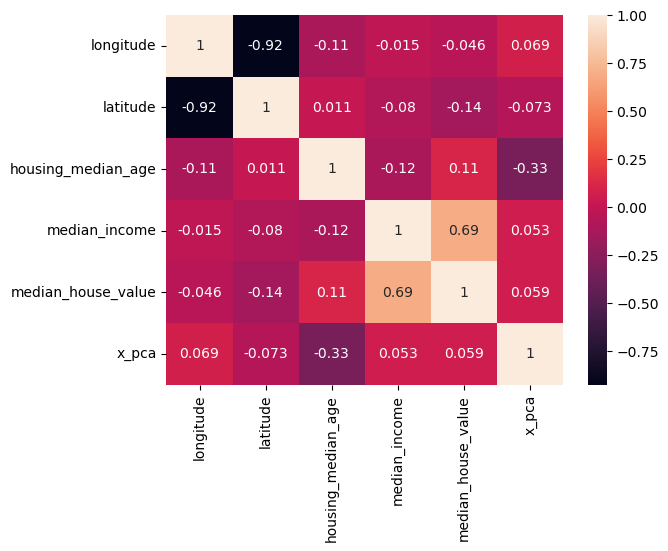

In [235]:
sns.heatmap(df_feat.drop(['INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN', 'total_rooms', 'total_bedrooms', 'population', 'households'], axis=1).corr(), annot=True)

In [236]:
house_reg_scaled = ols("median_house_value ~ longitude + latitude + x_pca + median_income + ISLAND + INLAND + NEAR_BAY + NEAR_OCEAN", data= df_feat).fit()
house_reg_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     3889.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:28:24   Log-Likelihood:            -2.6038e+05
No. Observations:               20640   AIC:                         5.208e+05
Df Residuals:                   20631   BIC:                         5.208e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.194e+05    881.133    249.008      0.000    2.18e+05    2.21e+05
longitude     -5.388e+04   2109.248    -25.547      0.000    -5.8e+04   -4.98e+04
latitude      -5.378e+04   2217.976    -24.248      0.000   -5.81e+04   -4.94e+04
x_pca          1469.9705    263.577      5.577      0.000     953.339    1986.602
median_income  6.865e+04    526.749    130.319      0.000    6.76e+04    6.97e+04
ISLAND         1.786e+05   3.26e+04      5.477      0.000    1.15e+05    2.43e+05
INLAND        -4.734e+04   1820.008    -26.013      0.000   -5.09e+04   -4.38e+04
NEAR_BAY       1.136e+04   1980.570      5.735      0.000    7476.092    1.52e+04
NEAR_OCEAN     9083.5412   1643.963      5.525      0.000    5861.243    1.23e+04
==============================================================================
Omnibus:                     4892.945   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13003.561
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       5.935   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
house_reg_scaled.predict(df_feat[['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN',
       'x_pca']])

0        403928.614557
1        410407.191891
2        366883.573262
3        308958.782012
4        244310.808897
             ...      
20635     31264.615906
20636     68795.208492
20637     41765.326580
20638     49897.547311
20639     69535.081861
Length: 20640, dtype: float64

In [263]:
df_feat["median_house_value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [264]:
X = df_feat[['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'x_pca', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN',]]

y = df_feat["median_house_value"]

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [271]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 7.45327052e-10  7.90699839e-10  4.27797117e-11  1.48652632e-10
  1.00000000e+00 -1.57971969e-11  4.71821186e-11  5.85955032e-10
 -3.67594911e-12 -2.72061610e-13]


In [272]:
lm.intercept_

0.0

In [276]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [274]:
y_pred = lm.predict(X)
y_pred

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [275]:
import sklearn.metrics as metrics
r2=metrics.r2_score(y, y_pred)
r2

1.0